# Predicting Titanic Survivors: A Comparative Analysis of Logistic Regression and Random Forest Models

This project compares the effectiveness of Logistic Regression and Random Forest models in predicting Titanic passenger survival. After preparing the data, we train both models and evaluate their performance, focusing on accuracy and classification metrics to determine which model is more reliable for this prediction task.

# Objective

The primary objective of this project is to develop and compare the performance of Logistic Regression and Random Forest models in predicting the survival of passengers on the Titanic. The project aims to explore the effectiveness of these models by analyzing their accuracy and classification metrics.

# Import Library

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [23]:
data = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv')

# Describe Data

In [24]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [26]:
print(data.head())
print(data.columns)

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [27]:
data = data.fillna(method='ffill')

<ipython-input-27-449dda89d9c2>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


# Data Preprocessing

In [28]:
# Handle missing values
data = data.fillna(method='ffill')

<ipython-input-28-21531d001e06>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')


In [29]:
# Convert categorical variables into numerical
categorical_columns = ['Sex', 'Embarked', 'Pclass']
for col in categorical_columns:
    if col in data.columns:
        data = pd.get_dummies(data, columns=[col], drop_first=True)

In [30]:
# Drop irrelevant columns if they exist
columns_to_drop = ['Name', 'Ticket', 'Cabin']
for col in columns_to_drop:
    if col in data.columns:
        data.drop(col, axis=1, inplace=True)

In [31]:
# Ensure all data is numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Data Visualization

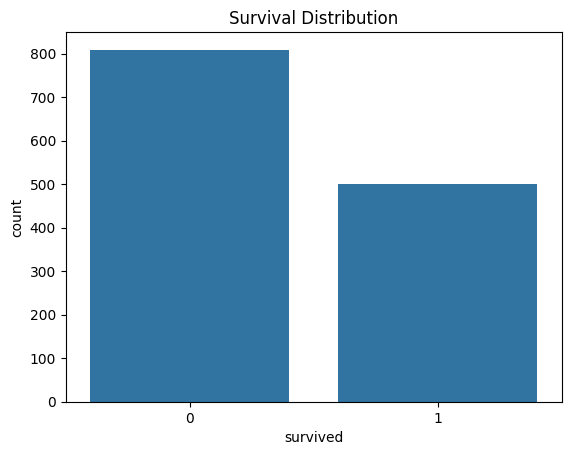

In [32]:
# Visualize the distribution of survivors
sns.countplot(x='survived', data=data)
plt.title('Survival Distribution')
plt.show()

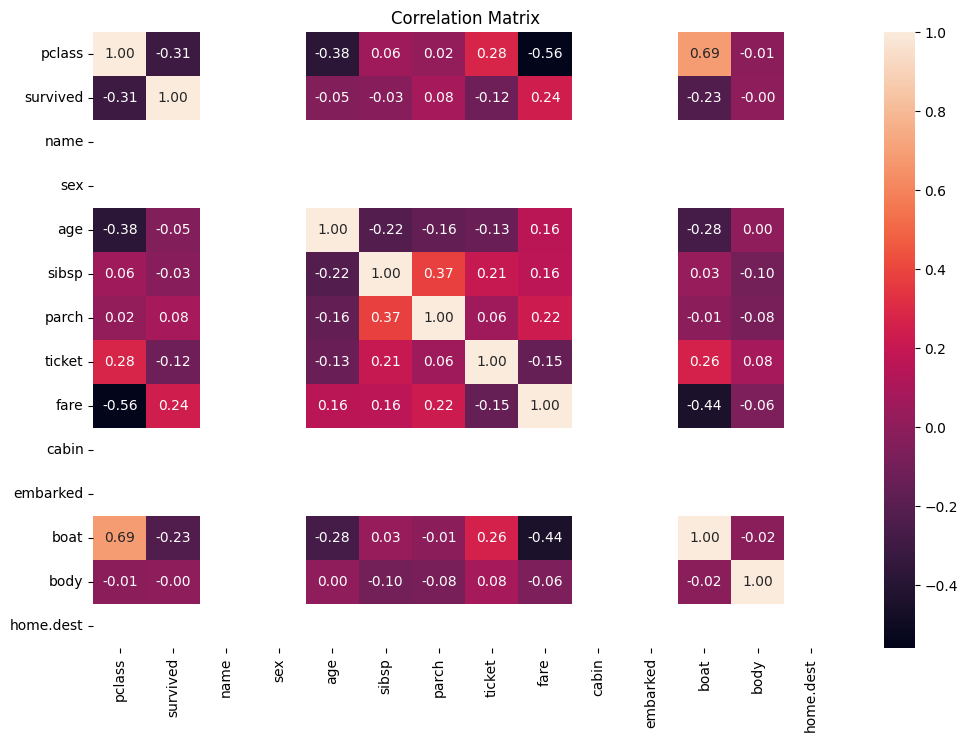

In [33]:
# Correlation matrix to see relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Define Target Variable (y) and Feature Variables (X)

In [34]:
# Model Building
X = data.drop('survived', axis=1)
y = data['survived']

# Train Test Split

In [35]:
# Impute missing values using mean strategy
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

/usr/local/lib/python3.11/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['name' 'sex' 'cabin' 'embarked' 'home.dest']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [36]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Modeling

In [37]:
# Train Logistic Regression model
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Model Evaluation

In [39]:
# Evaluate models
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Logistic Regression Accuracy: {accuracy_lr}")
print(f"Random Forest Accuracy: {accuracy_rf}")

print("Logistic Regression Classification Report")
print(classification_report(y_test, y_pred_lr))

print("Random Forest Classification Report")
print(classification_report(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.6068702290076335
Random Forest Accuracy: 0.6793893129770993
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.59      0.97      0.73       144
           1       0.80      0.17      0.28       118

    accuracy                           0.61       262
   macro avg       0.69      0.57      0.50       262
weighted avg       0.68      0.61      0.53       262

Random Forest Classification Report
              precision    recall  f1-score   support

           0       0.66      0.84      0.74       144
           1       0.71      0.48      0.58       118

    accuracy                           0.68       262
   macro avg       0.69      0.66      0.66       262
weighted avg       0.69      0.68      0.67       262



# Conclusion

In [40]:
# Predictions are already made during evaluation (y_pred_lr, y_pred_rf)

if accuracy_rf > accuracy_lr:
    print("Random Forest performs better.")
else:
    print("Logistic Regression performs better.")

Random Forest performs better.


# Explanation

Data Loading and Inspection:
The dataset is loaded from a CSV file, and the initial structure of the data is examined to understand its contents. The first few rows of the data and the column names are displayed.

Handling Missing Values:
The dataset contains missing values, which are addressed using forward filling (ffill). This method replaces missing values with the previous non-missing value in the column.

Encoding Categorical Variables:
Categorical variables like 'Sex', 'Embarked', and 'Pclass' are converted into numerical values using one-hot encoding. This allows these features to be used in the machine learning models.

Dropping Irrelevant Columns:
Columns that are not relevant for the prediction, such as 'Name', 'Ticket', and 'Cabin', are dropped from the dataset.

Visualization:
A count plot is generated to visualize the distribution of survivors in the dataset.
A correlation matrix is created to examine the relationships between the different features in the dataset.

Model Building:
The features (X) and the target variable (y) are separated. The target variable 'survived' indicates whether a passenger survived or not.
Missing values in the features are imputed using the mean strategy.
The data is split into training and testing sets to evaluate the models' performance.

Model Training and Evaluation:
Two models are trained: Logistic Regression and Random Forest.
The accuracy of each model is calculated and compared.
A classification report is generated for each model, providing detailed metrics like precision, recall, and F1-score.

Conclusion:
The project concludes by comparing the accuracy of the two models. Based on the results, the model with the higher accuracy is determined to perform better for this specific task.